<a href="https://colab.research.google.com/github/AsadillahRamadhan/PCVK/blob/main/Pertemuan7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

1. Sharpen
2. Emboss
3. Left Sobel Edge Detection
4. Canny Edge Detection
5. Prewitt Edge Detection
6. 5x5 Gaussian Blur
7. 21x21 Gaussian Blur
Masukkan Operasi: 7




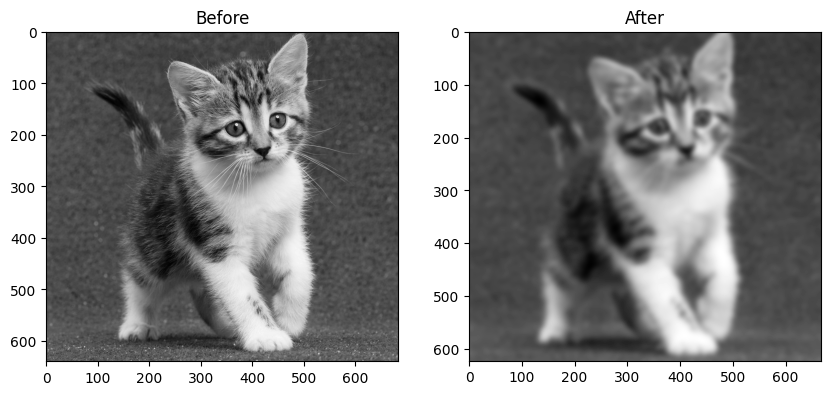

In [36]:
for i in range(1):
  print('1. Sharpen')
  print('2. Emboss')
  print('3. Left Sobel Edge Detection')
  print('4. Canny Edge Detection')
  print('5. Prewitt Edge Detection')
  print('6. 5x5 Gaussian Blur')
  print('7. 21x21 Gaussian Blur')
  try:
    operasi = int(input('Masukkan Operasi: '))
  except ValueError:
    print('Masukkan Angka!')
    break

  if(operasi != 1 and operasi != 2 and operasi != 3 and operasi != 4 and operasi != 5 and operasi != 6 and operasi != 7):
    print('Masukkan Angka Yang Benar!')
    break
  else:
    index = operasi - 1

  gaussian_blur_5x5 = [
      [1,4,6,4,1],
      [4,16,24,16,4],
      [6,24,36,24,6],
      [4,16,24,16,4],
      [1,4,6,4,1]
  ]

  for i in range(len(gaussian_blur_5x5)):
    for j in range(len(gaussian_blur_5x5[0])):
      gaussian_blur_5x5[i][j] *= (1/256)

  sigma = math.sqrt(21)
  gaussian_kernel = cv.getGaussianKernel(21, sigma)
  gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
  kernel = [
      [
          [0,-1,0],
          [-1,5,-1],
          [0,-1,0]
      ],
      [
          [-2,-1,0],
          [-1,1,1],
          [0,1,2]
      ],
      [
          [1,0,-1],
          [2,0,-2],
          [1,0,-1]
      ],
      [
          [-1,-1,-1],
          [-1,8,-1],
          [-1,-1,-1]
      ],
      [
          [-1,-1,-1],
          [0,0,0],
          [1,1,1]
      ],
      gaussian_blur_5x5,
      gauss_kernel
  ]

  img = cv.imread('/content/drive/MyDrive/PCVK/kitten.jpg')
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  def convolution2d(image, kernel, stride, padding):
    image = np.pad(image, padding, mode='constant', constant_values=0)
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    padded_height, padded_width = image.shape
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1
    new_image = np.zeros((output_height, output_width)).astype(np.float32)
    for y in range(0, output_height):
      for x in range(0, output_width):
        new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

    return new_image


  hasil_image = convolution2d(gray, kernel[index], 1, 2)
  print('\n')
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(gray, cmap='gray')
  plt.title('Before')
  plt.subplot(1, 2, 2)
  plt.imshow(hasil_image, cmap='gray')
  plt.title('After')

  plt.show()